In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
data_size = 100
data = pd.DataFrame({
    'AQI': np.random.uniform(50, 150, data_size),
    'PM10': np.random.uniform(20, 80, data_size),
    'PM2.5': np.random.uniform(10, 50, data_size),
    'NO2': np.random.uniform(5, 40, data_size),
    'SO2': np.random.uniform(2, 20, data_size),
    'O3': np.random.uniform(10, 60, data_size),
    'Temperature': np.random.uniform(15, 35, data_size),
    'Humidity': np.random.uniform(30, 90, data_size),
    'Wind_Speed': np.random.uniform(0.5, 5.0, data_size),
    'HealthImpactScore': np.random.uniform(0, 100, data_size)  # Target
})

In [3]:
# Pisahkan fitur (X) dan target (y)
X = data[['AQI', 'PM10', 'PM2.5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'Wind_Speed']]
y = data['HealthImpactScore']

In [4]:
# Split data ke training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Membangun model Neural Network
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

C:\Users\Fadika\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Kompilasi model
model_nn.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

In [8]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [9]:
# Melatih model
history = model_nn.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2873.5427 - mae: 46.6602 - val_loss: 2878.2822 - val_mae: 45.2692
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2645.5845 - mae: 42.0324 - val_loss: 2563.0142 - val_mae: 42.1039
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2437.0264 - mae: 41.9032 - val_loss: 2105.3884 - val_mae: 38.1767
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1739.0231 - mae: 34.5269 - val_loss: 1560.2760 - val_mae: 32.8710
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 942.6826 - mae: 23.1131 - val_loss: 1171.7078 - val_mae: 29.4916
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 698.9082 - mae: 22.7932 - val_loss: 1284.7544 - val_mae: 29.4348
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 634.4097 - mae: 21.7293 - val_loss: 1477.2419 - val_mae: 31.2765
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 677.7320 - mae: 21.8053 - val_loss: 1383.2816 - val_mae: 31.9904
Epoch 9/100
5/5 ━━━

In [10]:
# Evaluasi model
train_loss, train_mae = model_nn.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_mae = model_nn.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Training Loss (MSE): {train_loss:.2f}, Training MAE: {train_mae:.2f}")
print(f"Testing Loss (MSE): {test_loss:.2f}, Testing MAE: {test_mae:.2f}")

Training Loss (MSE): 742.33, Training MAE: 22.43
Testing Loss (MSE): 1171.71, Testing MAE: 29.49


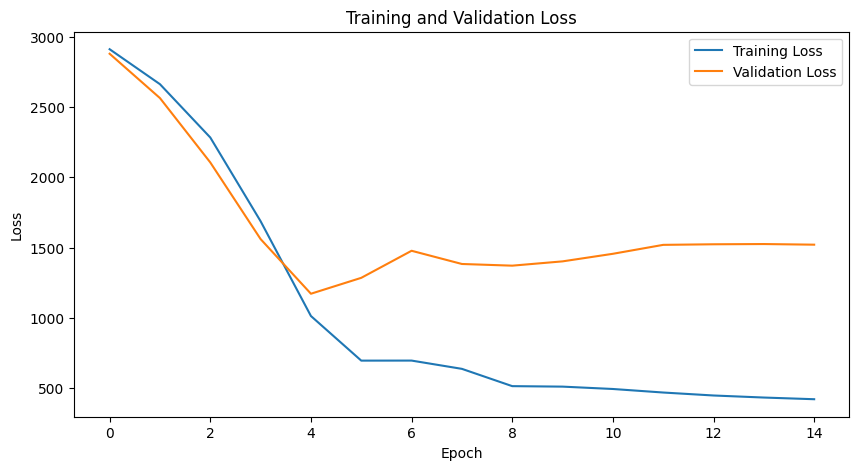

In [11]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

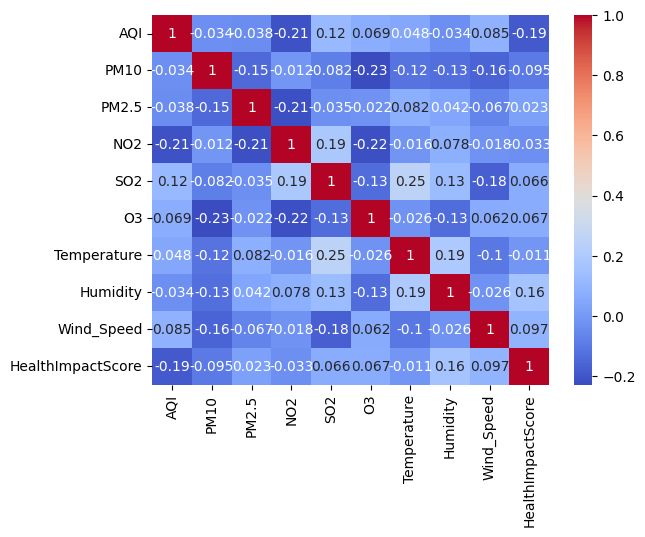

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")


Random Forest - MSE: 1133.5866745181459, R²: -0.3442843374075446


In [14]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb}, R²: {r2_xgb}")

XGBoost - MSE: 1414.4671486666664, R²: -0.6773715468544625


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Score: 0.09365565443638131
